## IBM HR Analytics Project 

### Background/Introduction:

Attrition/Churn/Turnover Rate refers to the rate at which employees leave a company. Employee turnover is a costly problem for organizations. The cost of replacing an employee can be quite large, and a study found that companies typically pay about one-fifth of an employee's salary to replace them. The cost can significantly increase if executives or highest-paid employees are to be replaced. The cost of replacing employees for most employers remains significant. This is due to the amount of time spent to interview and find a replacement, sign-on bonuses, and the loss of productivity for several months while the new employee gets accustomed to the new role.

### What is HR/People/Talent/Workforce Analytics ?

HR/People/Talent/Workforce Analytics is the process of using data to make strategic decisions about an organization's workforce. It involves collecting, analyzing, and interpreting data from various sources such as HR systems, employee surveys, and performance metrics to gain insights into trends, patterns, and opportunities for improvement.

### Problem Statement:

To understand why and when employees are most likely to leave an oroganisation. This can help structure the actions to improve employee retention as well as possibly planning new hiring in advance. We will attempt to address the problem statement using the below questions:

1. What is the likelihood of an active employee leaving the company?
2. What are the key indicators of an employee leaving the company?
3. What policies or strategies can be adopted based on the results to improve employee retention?
   
Given that we have data on former employees, this is a standard supervised classification problem where the label is a binary variable, 0 (likely to stay), 1 (likely to leave). In this study, our target variable Y is the probability of an employee leaving the company.

### Project Structure:

1.Data Exploration

2.Data Preprocessing

3.Exploratory Data Analysis (EDA) 

4.Data Visualization  

5.Feature Selection

6.Model Selection and Training

7.Model Evaluation using ML Algorithms for Attrition Prediction

8.Classification Report and Accuracy Explanation

9.Conclusion and Sources

### Exploring the data set:

In this case study, a HR dataset was sourced from IBM HR Analytics Employee Attrition & Performance which contains employee data for 1,470 employees with various information about the employees. I will use this dataset to predict when employees are going to quit by understanding the main drivers of employee churn.

As stated on the IBM website "This is a fictional data set created by IBM data scientists". Its main purpose was to demonstrate the IBM Watson Analytics tool for employee attrition.

### Dataset Source:

The IBM HR Analytics Employee Attrition & Performance dataset is used for this project. It can be found at https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

#### Importing Libraries/Modules

We will import all the required libraries and modules required for our project as follows:

In [38]:
#importing libraries for data handling and analysis
import pandas as pd
import numpy as np

#importing libraries for data visualisations
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
import plotly.express as px

#importing warnings to avoid any future warnings
import warnings

# ml libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 

### Reading the Dataset

Exploring data set is the important. Let us import the dataset using pandas to know what the data contains.

In [39]:
file_path = '/Users/shivanikanodia/Desktop/Data Sets/WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(file_path)
df.head() 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [40]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

The Dataset has no missing values and blank coulmns. 

In [41]:
df.shape 

(1470, 35)

In [42]:
df.describe() 

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Key Observations and Insights

1. Stagnation in Promotions
Some employees have gone 15 years without a promotion, signaling potential stagnation.

**Key Questions to Address:**
Which departments and roles are experiencing this stagnation?
Is the lack of promotion contributing to attrition in these areas?

2. Low Environment Satisfaction, Job Involvelemt and Relationship Satisfaction Scores 
The average score for above mentoned metrics is 2.0, which is below the acceptable level of 3.0 (50%).

**Key Areas to Investigate:**
Which departments have the lowest satisfaction scores?
How does this dissatisfaction correlate with attrition rates in those departments?

3. Long Commutes (Distance from Home)
The maximum distance from home recorded is 29 km, which may pose a risk for employee attrition.

**Key Areas to Investigate:**
Are employees living farther from the workplace more likely to leave?
Could flexible work options help mitigate this risk?

4. Lack of Promotions for Employees with 3–4 Years Tenure
25% of employees with 3–4 years of tenure have not received a promotion.

**Key Areas to Investigate:**
Does this group exhibit higher attrition rates compared to employees who were promoted within the same timeframe?
Are there barriers or gaps in the promotion process that need to be addressed?


In [43]:
df.nunique() 

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [44]:
df.describe(include = 'object')  

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


From Above describtive summary we can infer that unique attrition is 2 from 3 business travel, indicates that business travel leads to attrition. 
Overtime can also be one of the potential leading to attrition as there are 2 Unique Over time with 2 unique attriton values. 

### Data Visualization

### Data Visualization

#Lets Look at few patterns and trends from the dataset, data visualization helps us to easily interpret and analyse data. let's explore our dataset using Python's important and powerful libraries for visualization i.e. Matplotlib and seaborn.

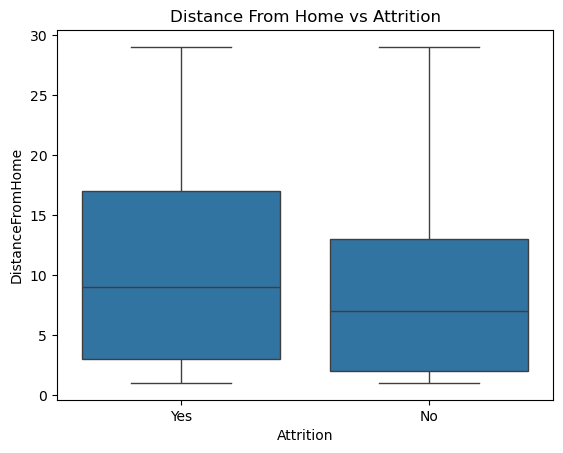

In [45]:
# Distance from Home
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df)
plt.title('Distance From Home vs Attrition')
plt.show() 

**Employee Job Involvement across different Job Levels** 

/var/folders/3_/spjvw8t50td0f_vwwrr6rs900000gn/T/ipykernel_71043/1722692185.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='JobLevel', y='JobInvolvement', data= Job_Involvement, palette='viridis')


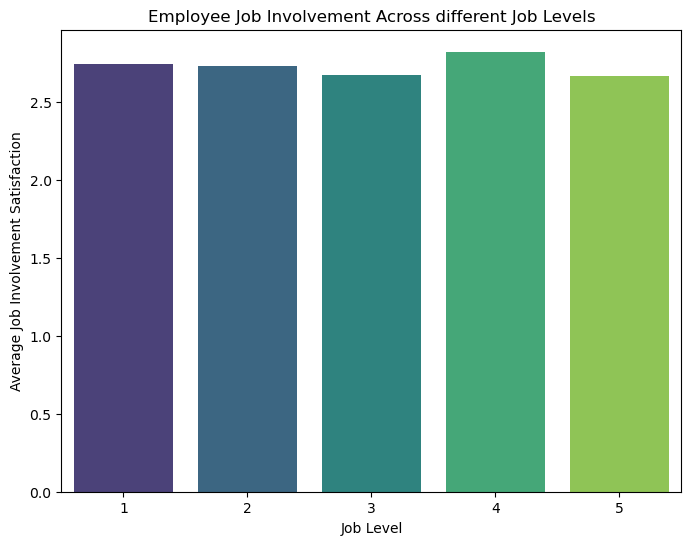

In [46]:
Job_Involvement = df.groupby('JobLevel')['JobInvolvement'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='JobLevel', y='JobInvolvement', data= Job_Involvement, palette='viridis')
plt.title('Employee Job Involvement Across different Job Levels')
plt.xlabel('Job Level')
plt.ylabel('Average Job Involvement Satisfaction')
plt.show() 

**Employee Environement Satisfasction across different Job Levels** 

/var/folders/3_/spjvw8t50td0f_vwwrr6rs900000gn/T/ipykernel_71043/3094768362.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='JobLevel', y='EnvironmentSatisfaction', data=env_satisfaction, palette='viridis')


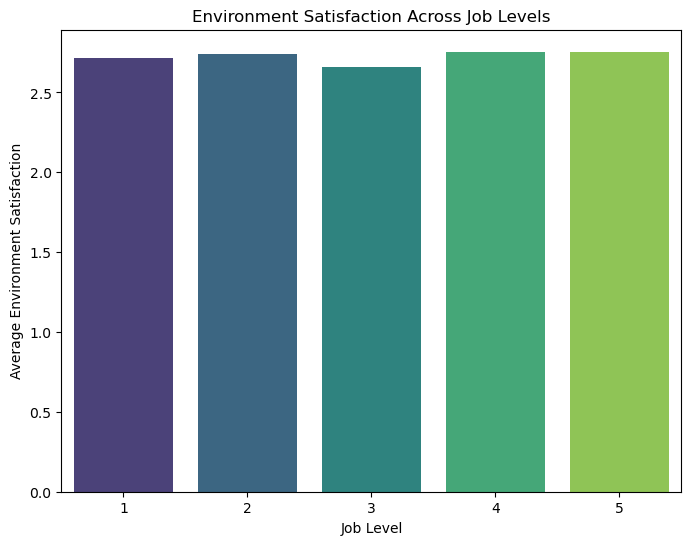

In [47]:
# Aggregate mean EnvironmentSatisfaction by JobLevel
env_satisfaction = df.groupby('JobLevel')['EnvironmentSatisfaction'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='JobLevel', y='EnvironmentSatisfaction', data=env_satisfaction, palette='viridis')
plt.title('Environment Satisfaction Across Job Levels')
plt.xlabel('Job Level')
plt.ylabel('Average Environment Satisfaction')
plt.show() 

From visualisation we can view that employees with level 3 (mid-level) have less job satisfaction in comparison with employee of other Job levels, which indicates employees with level 3 are at risk of leaving the organisation. 

**Years Since last promotion by Department and by Role** 

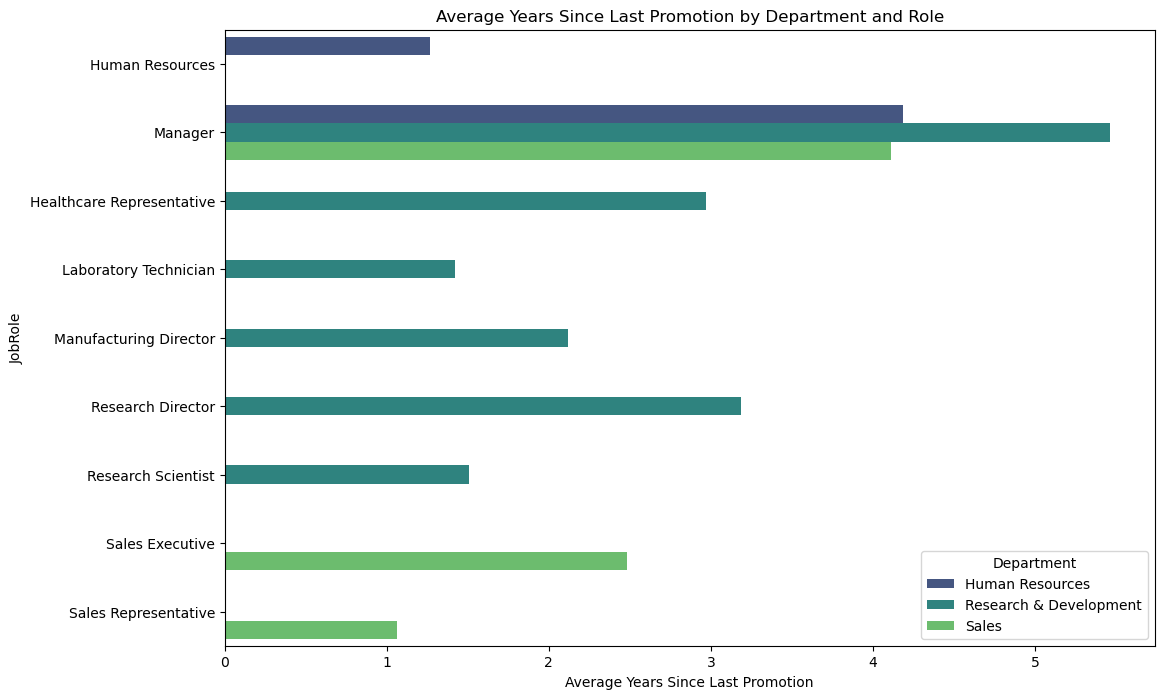

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate YearsSinceLastPromotion by Department and JobRole
promotion_stagnation = df.groupby(['Department', 'JobRole'])['YearsSinceLastPromotion'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='YearsSinceLastPromotion', y='JobRole', hue='Department', data=promotion_stagnation, palette='viridis')
plt.title('Average Years Since Last Promotion by Department and Role')
plt.xlabel('Average Years Since Last Promotion')
plt.ylabel('JobRole')
plt.legend(title='Department')
plt.show() 

Healthcare representative and Sales representative were promoted before 2-3 years which can lead to Job dissatisfaction and could be a potential factor towards attrition. 

The graph illustrates that employees within Sales Department are having little lower Jobs Satisfaction level then other Departments still all the departments has job satisfaction level lower then 3 point, which is already less then thresold, suggesting potential improvements in job work, Learning and developement and work life. 

/var/folders/3_/spjvw8t50td0f_vwwrr6rs900000gn/T/ipykernel_71043/754064239.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='JobRole', y='EnvironmentSatisfaction', data=env_satisfaction_dept, palette='coolwarm')


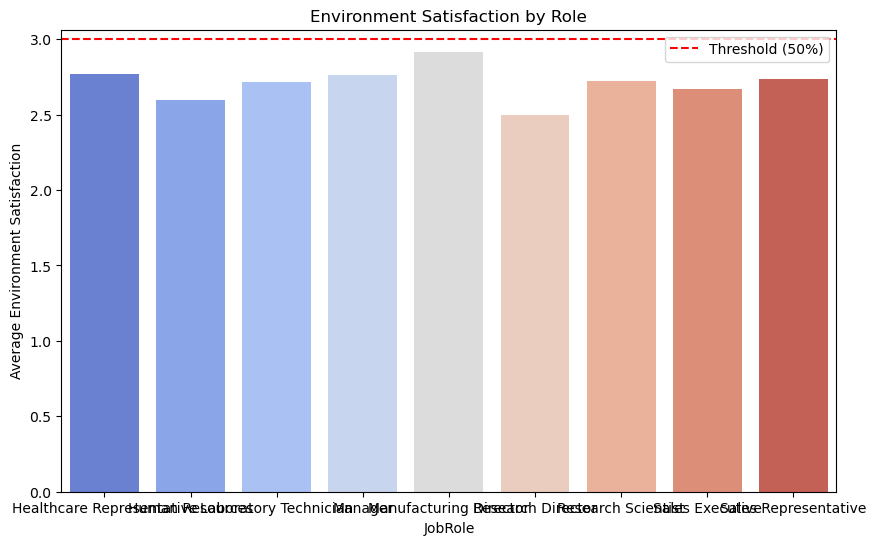

In [7]:

## Aggregate EnvironmentSatisfaction by Role 
env_satisfaction_dept = df.groupby('JobRole')['EnvironmentSatisfaction'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='JobRole', y='EnvironmentSatisfaction', data=env_satisfaction_dept, palette='coolwarm')
plt.axhline(3, color='red', linestyle='--', label='Threshold (50%)')
plt.title('Environment Satisfaction by Role')
plt.xlabel('JobRole')
plt.ylabel('Average Environment Satisfaction')
plt.legend()
plt.show() 

/var/folders/3_/spjvw8t50td0f_vwwrr6rs900000gn/T/ipykernel_71043/919815601.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='EnvironmentSatisfaction', data=env_satisfaction_dept, palette='coolwarm')


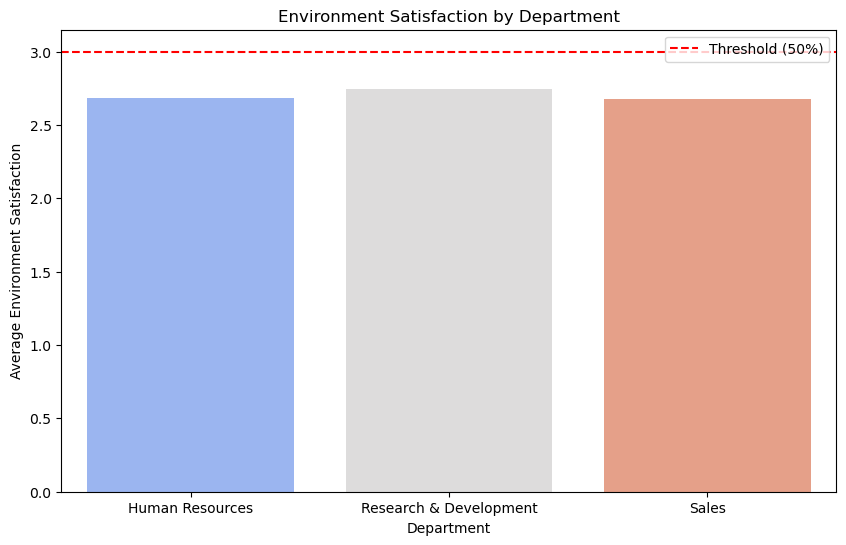

In [49]:
## Aggregate EnvironmentSatisfaction by Department
env_satisfaction_dept = df.groupby('Department')['EnvironmentSatisfaction'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='EnvironmentSatisfaction', data=env_satisfaction_dept, palette='coolwarm')
plt.axhline(3, color='red', linestyle='--', label='Threshold (50%)')
plt.title('Environment Satisfaction by Department')
plt.xlabel('Department')
plt.ylabel('Average Environment Satisfaction')
plt.legend()
plt.show() 

### Employees with No Promotions by Department & Role with 3-4 years of Experience

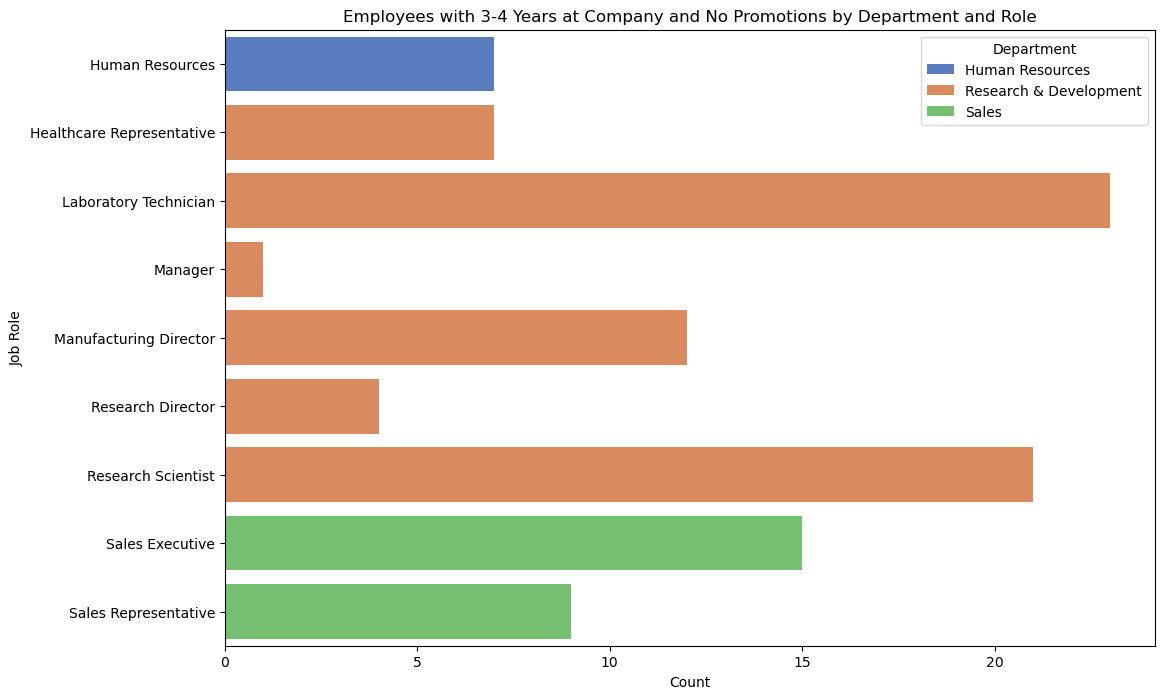

In [20]:
# Filter employees with 3-4 years at the company and no promotions
stagnant_employees = df[(df['YearsAtCompany'].between(3, 4)) & (df['YearsSinceLastPromotion'] == 0)]

# Count by Department and JobRole
stagnant_counts = stagnant_employees.groupby(['Department', 'JobRole']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='JobRole', hue='Department', data=stagnant_counts, palette='muted')
plt.title('Employees with 3-4 Years at Company and No Promotions by Department and Role')
plt.xlabel('Count')
plt.ylabel('Job Role')
plt.legend(title='Department')
plt.show() 

- Laboratory Technician, Research Scientist and  Sales executives are the employee one who have been with organisation since 3-4 years and have had not promotions. 
- Managing directors are one's without promotion which could be at risk of attrition, indicating that the attrition at such level is not good for organisation and needs to be monitored. 

In [50]:
#removing unwanted columns
df = df.drop('Over18', axis = 1)
df = df.drop('EmployeeNumber', axis = 1)
df = df.drop('StandardHours', axis = 1)
df = df.drop('EmployeeCount', axis = 1) 

**Employee Environement Satisfaction across different Job Levels** 

### Exploration of Numerical Columns using Histograms.

We can explore all numerical columns using df.hist(). It help us understand the data better, with this visualization we are able to see how our data is distributed and if there are any outliers in the data sets.

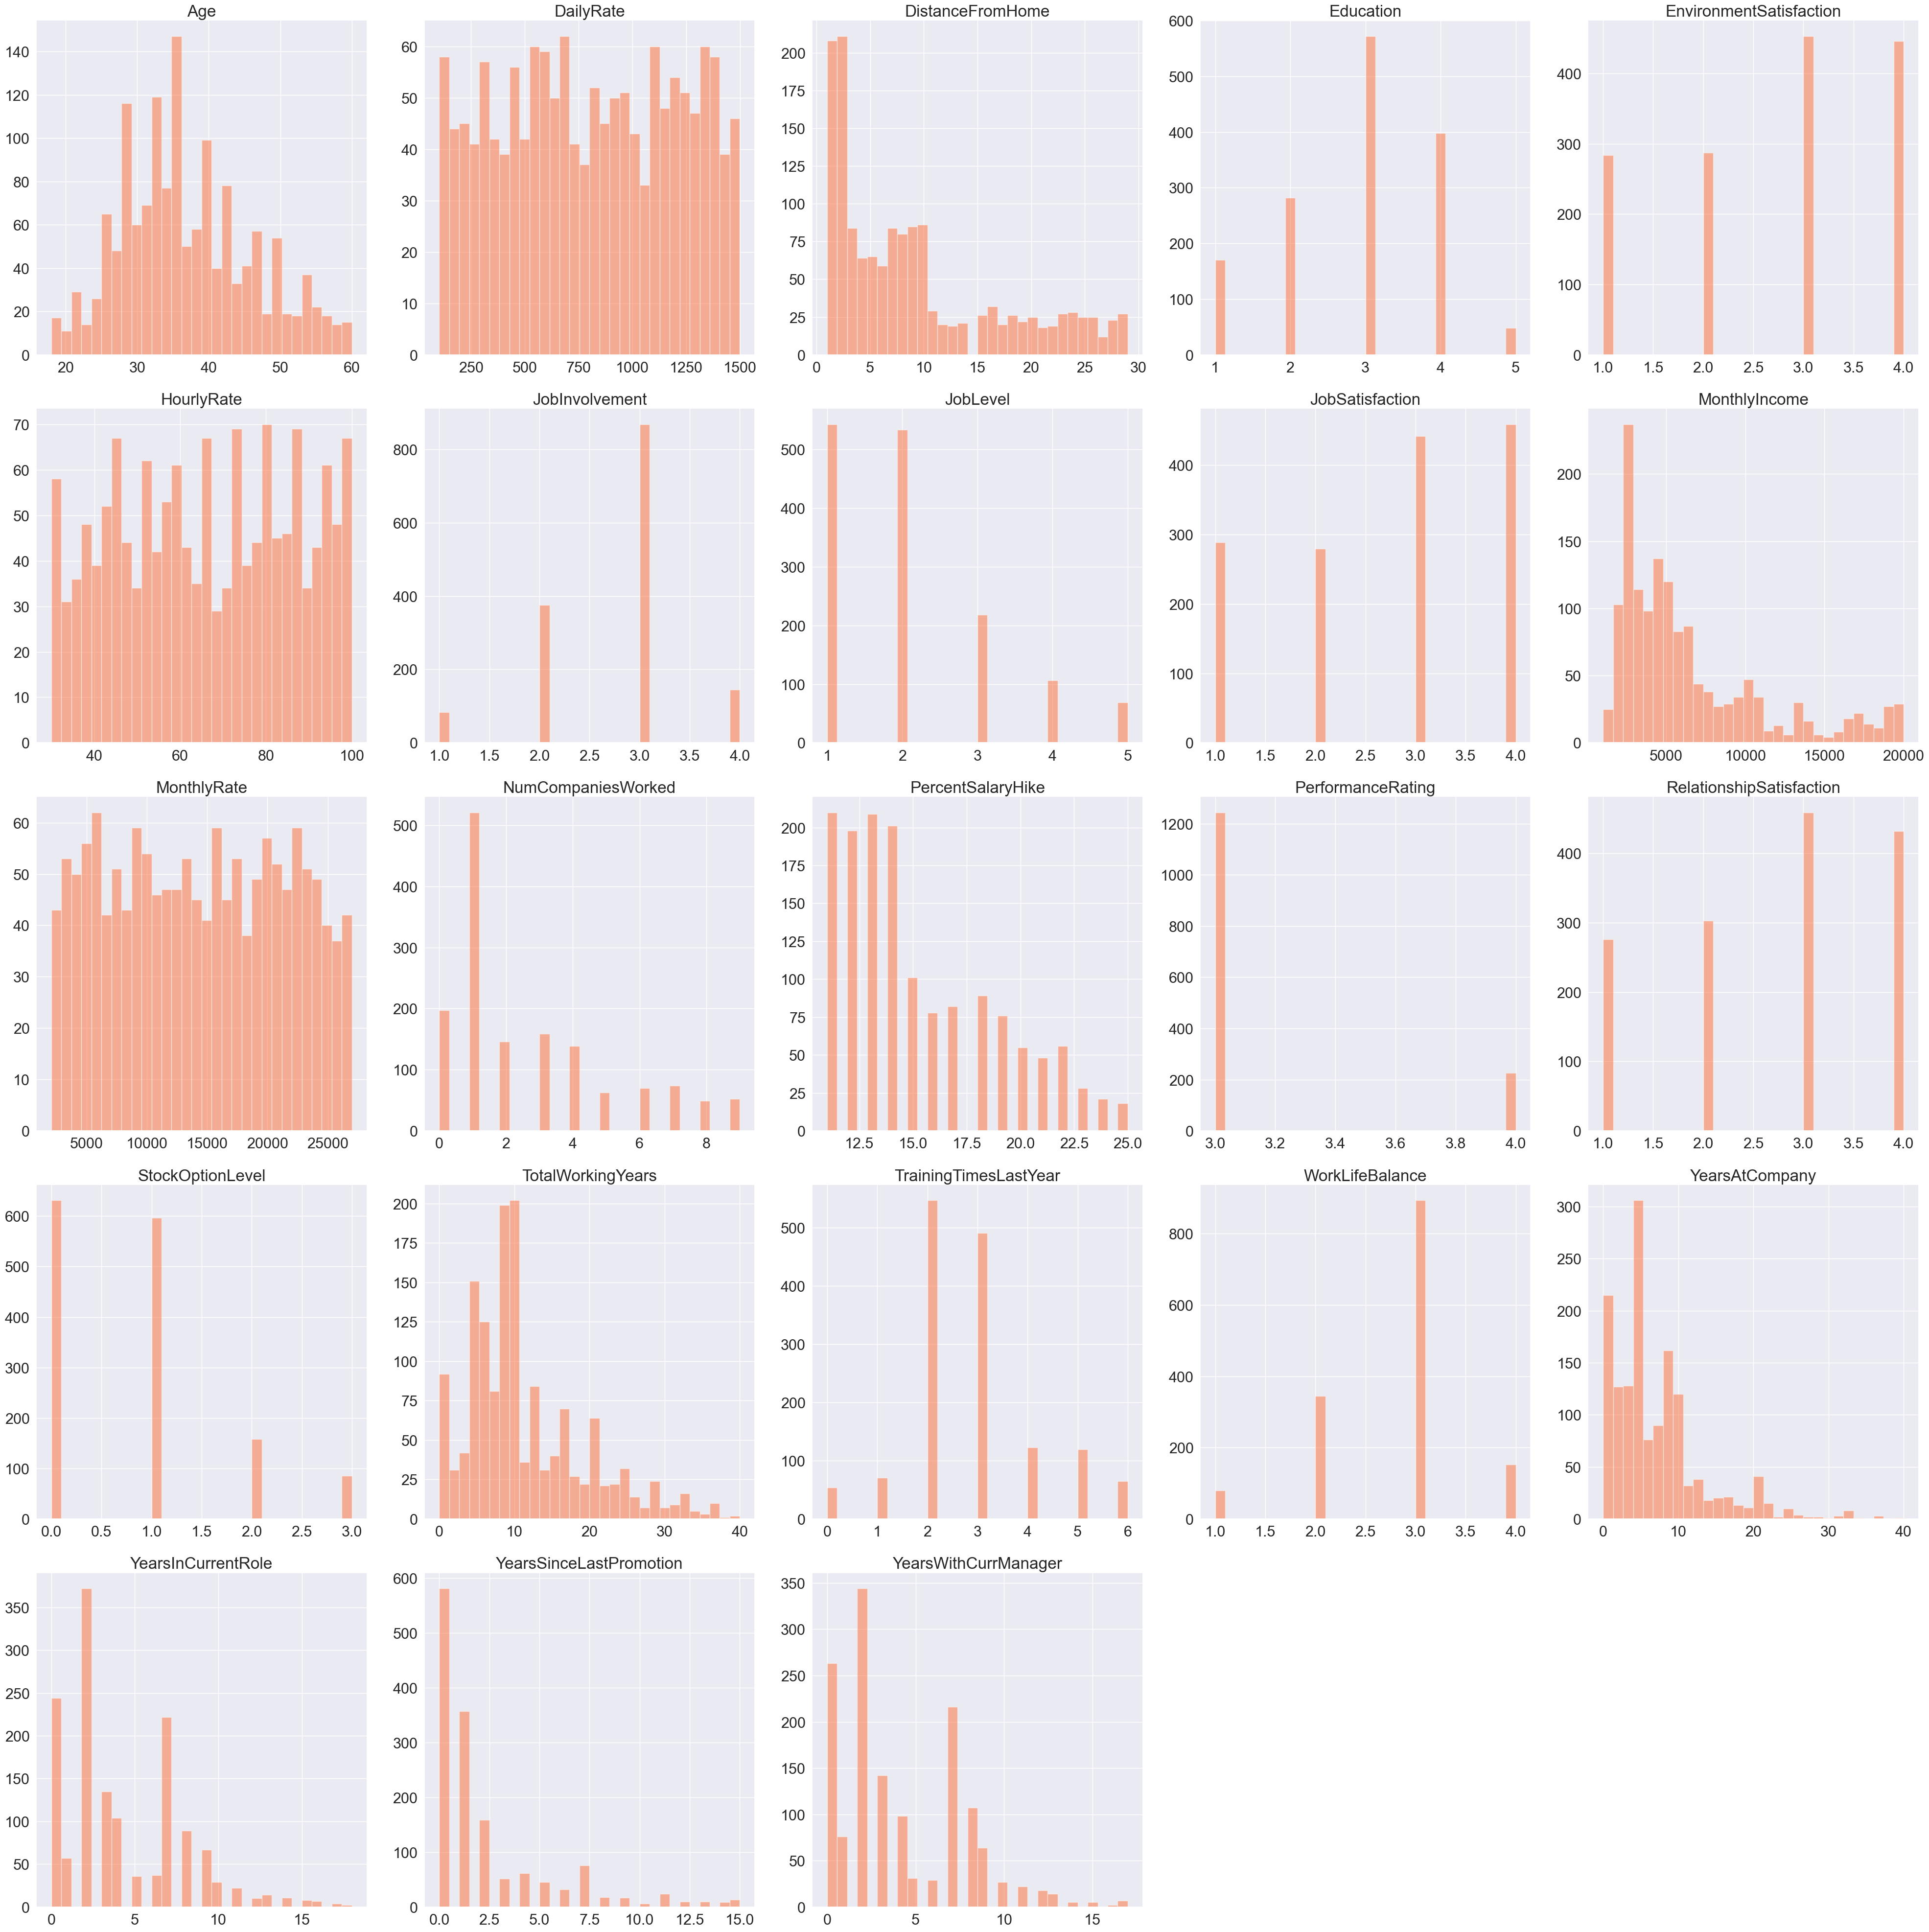

In [52]:
#Define color palette
my_palette = sns.color_palette('rainbow')

# Set font size
sns.set(font_scale=2)

# Plot histogram

df.hist(bins=30, figsize=(40,40), color=my_palette[5], alpha=0.5)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.tight_layout()
plt.show() 

With Above histrograms we can infer that performance rating, years in current role, years at company and years since last promotion is right skewed, suggests thay small group of high performers or employees who have not been promoted for a long time and could signal a need to focus on career progression for employees in the long tail.

In [53]:
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save the encoder for inverse transformation if needed

print("Label Encoded DataFrame:")
print(df.head()) 

Label Encoded DataFrame:
   Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2               1                        2       0  ...   
1          1               1                        3       1  ...   
2          2               4                        4       1  ...   
3          4               1                        4       0  ...   
4          1               3                        1       1  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                

#### Looking at Correlation Matrix for the features 

We will see the correlation between all the numerical columns to understand the inter-relation and dependancy between them. It expresses the extent to which two variables are linearly related with each other.

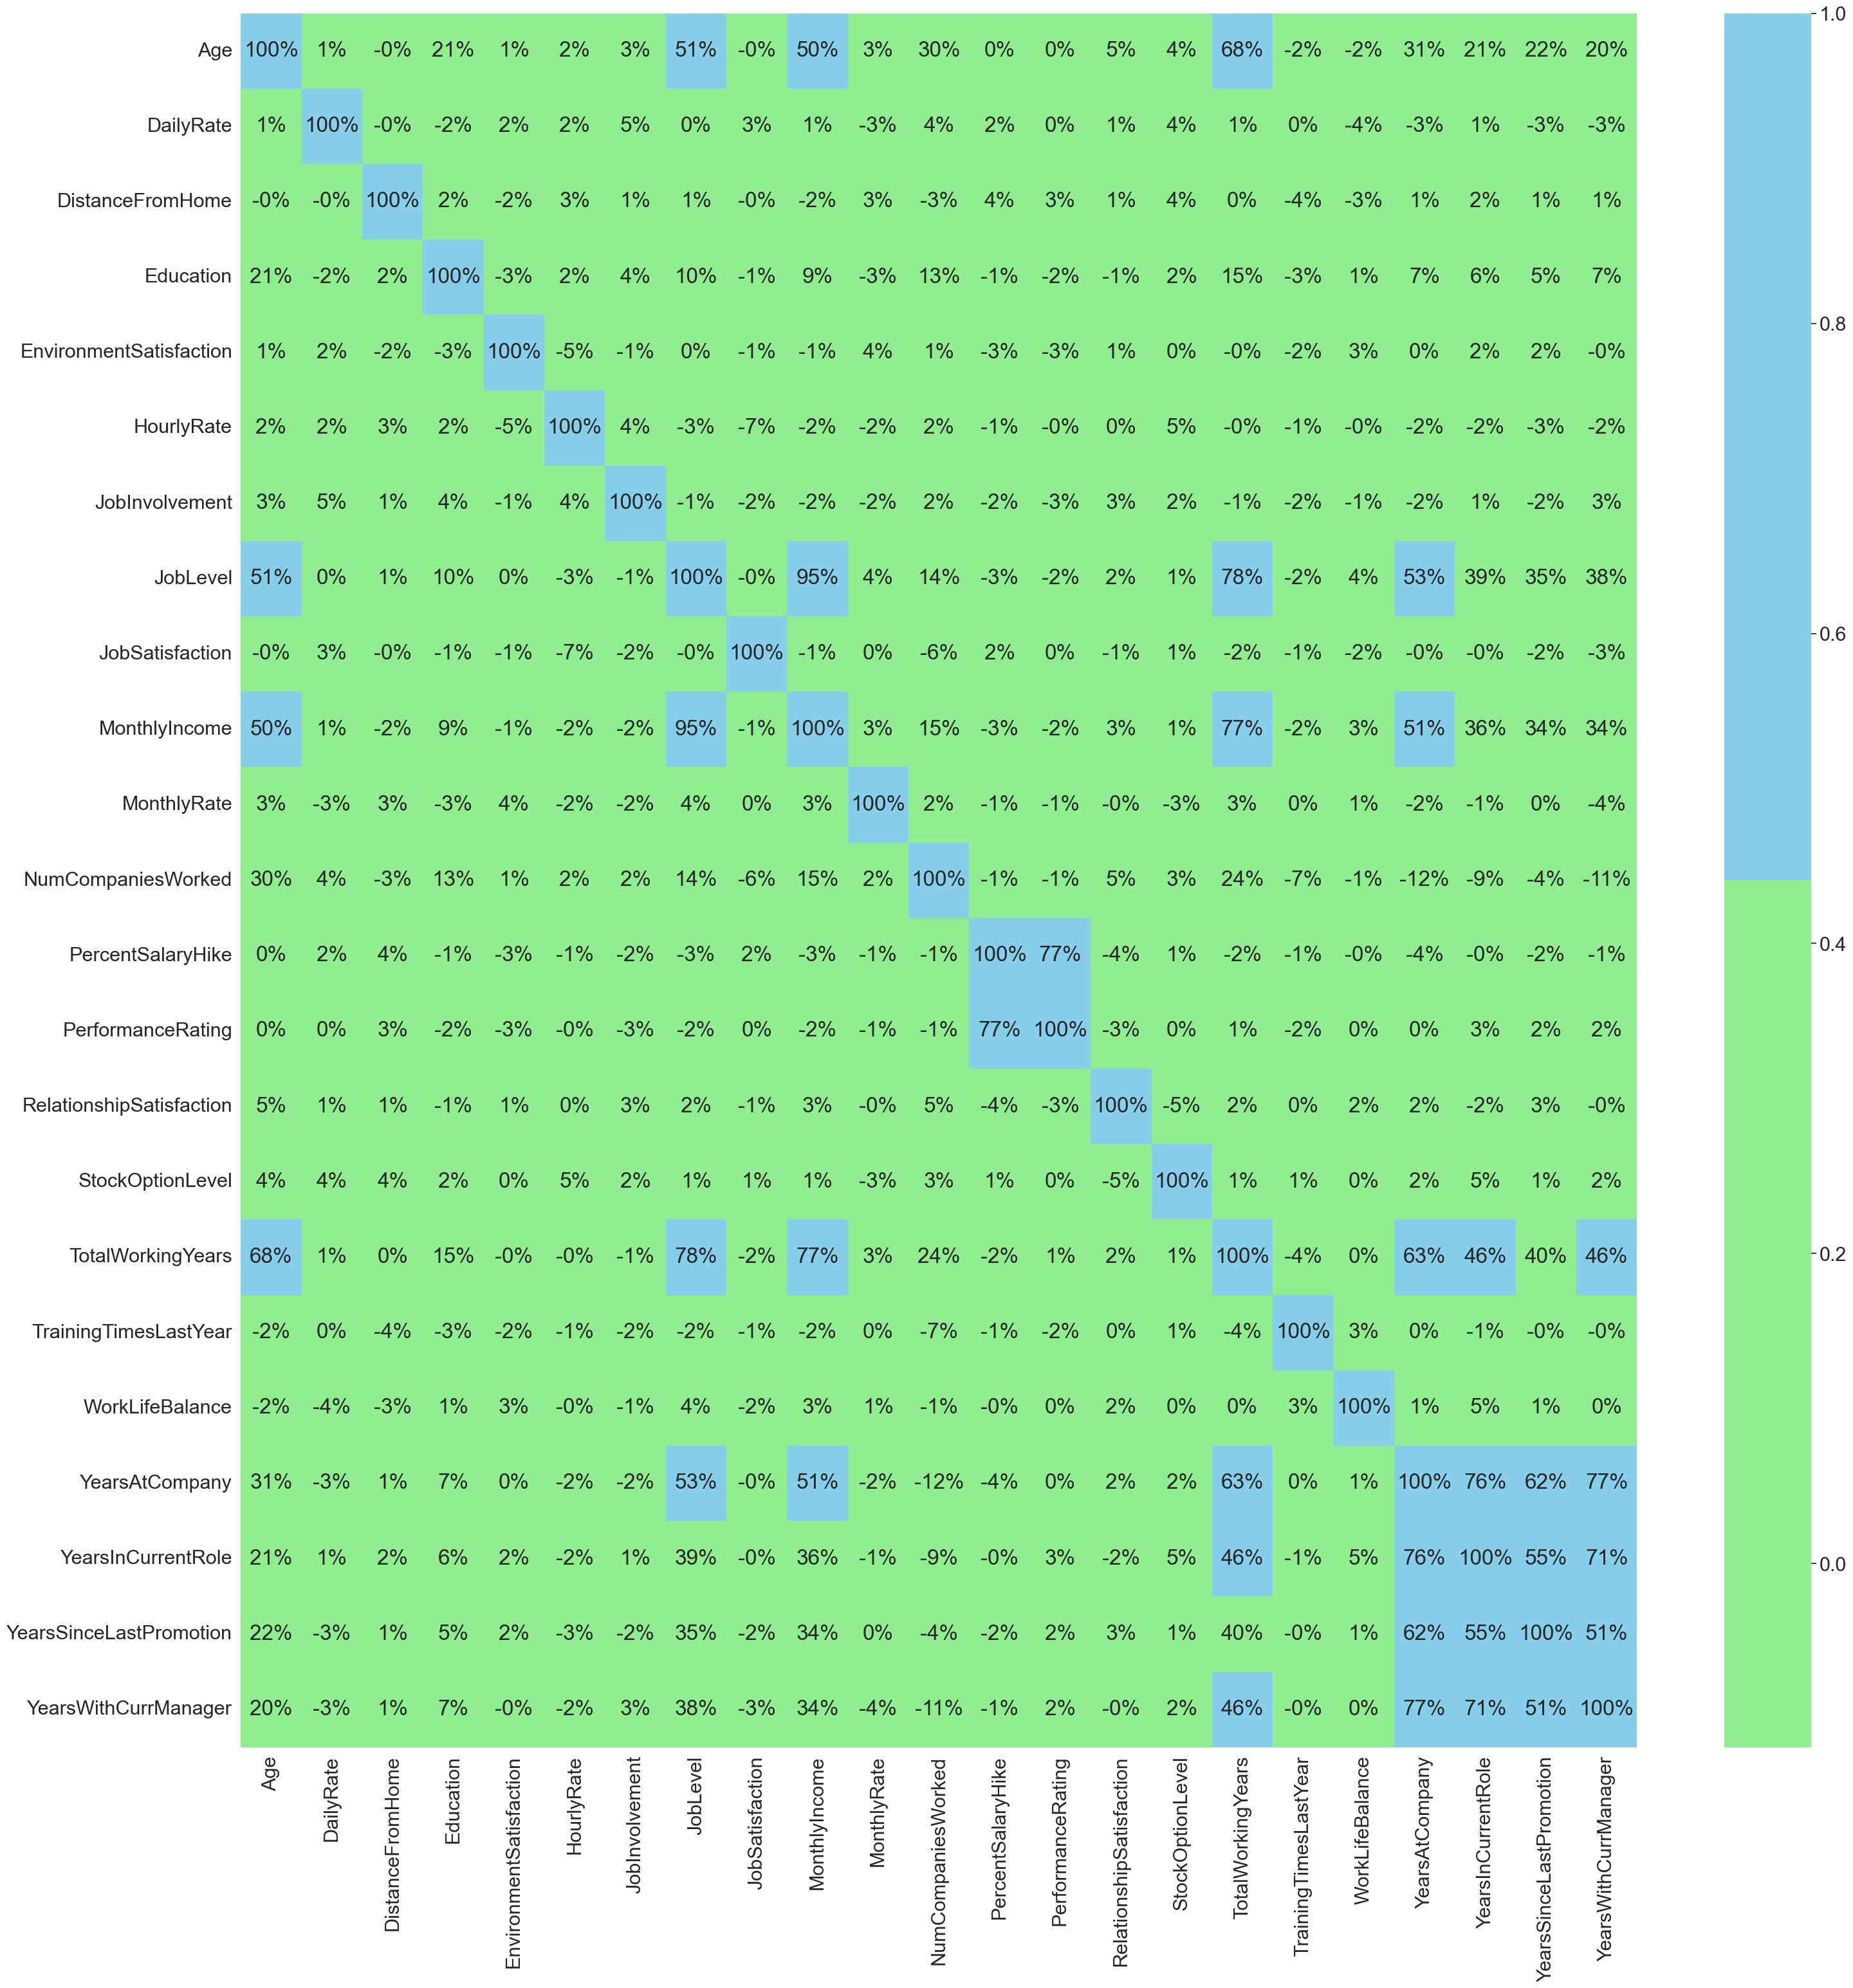

In [54]:
# Separate X and y variables
X = df[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 
          'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 
          'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
          'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 
          'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 
          'YearsSinceLastPromotion', 'YearsWithCurrManager']]
y = df[['Attrition']].values.ravel()

# Create a correlation matrix
corr_matrix = X.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(35,35))
sns.heatmap(corr_matrix, annot=True, fmt='.0%', cmap=sns.color_palette(['lightgreen', 'skyblue']))

# Show the plot
plt.show() 

## Implementing Machine Learning Algorithms for Attrition Prediction

Lets see, how accurately can we we predict if an employee will stay or resign with these variables: 

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables (if needed)
df = pd.get_dummies(df, drop_first=True)

# Define X and y
X = df.drop(columns=['Attrition'])
y = df['Attrition']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)


In [59]:

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred)) 


[[362   8]
 [ 62   9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       370
           1       0.53      0.13      0.20        71

    accuracy                           0.84       441
   macro avg       0.69      0.55      0.56       441
weighted avg       0.80      0.84      0.80       441


Accuracy Score:
0.8412698412698413


In [60]:

# Create pipeline
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(random_state=42))
])

# Define hyperparameter grid
param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [5, 10, None],
    'clf__min_samples_split': [2, 5],
    'clf__min_samples_leaf': [1, 2],
    'clf__max_features': ['sqrt']
}

# GridSearchCV
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='recall',  # focus on catching leavers
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit model
grid.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid.best_params_)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Predict & evaluate
y_pred = grid.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred)) 



Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'clf__max_depth': 5, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}

Confusion Matrix:
[[362   8]
 [ 62   9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86       370
           1       0.34      0.42      0.38        71

    accuracy                           0.78       441
   macro avg       0.61      0.63      0.62       441
weighted avg       0.80      0.78      0.79       441




The dataset is imbalanced with a significantly lower number of employees labeled as attrition = 1. I used **SMOTE (Synthetic Minority Oversampling Technique)** to synthetically balance the training dataset. However, to avoid data leakage, I embedded SMOTE within a pipeline, so it’s only applied to training folds during cross-validation. 

I used GridSearchCV along with **5-fold cross-validation** to tune hyperparameters of the RandomForestClassifier. The scoring metric was set to recall to prioritize identifying employees at risk of leaving **(class 1).** 

Although the model achieved an accuracy of 78%, I focused more on class 1 recall, which improved from 13% (baseline) to **42%** after applying **SMOTE + class weights.** 


- Class 0 (Stay):

The model is very strong at identifying employees likely to stay.
Precision: 88% → Most "stay" predictions are correct.
Recall: 85% → It correctly catches 85% of actual stayers.

- Class 1 (Leave):

The model struggles to detect who will leave, but it’s better than before!
**Recall:42% →** It correctly flags 9 out of 21 leavers (better than earlier ~8%).
**Precision:** 34% → About 1 in 3 flagged as "leaver" truly left.
   

In [64]:
!pip install xgboost 
!pip install shap 

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:22:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.87      0.94      0.91       370
           1       0.50      0.30      0.37        71

    accuracy                           0.84       441
   macro avg       0.69      0.62      0.64       441
weighted avg       0.81      0.84      0.82       441



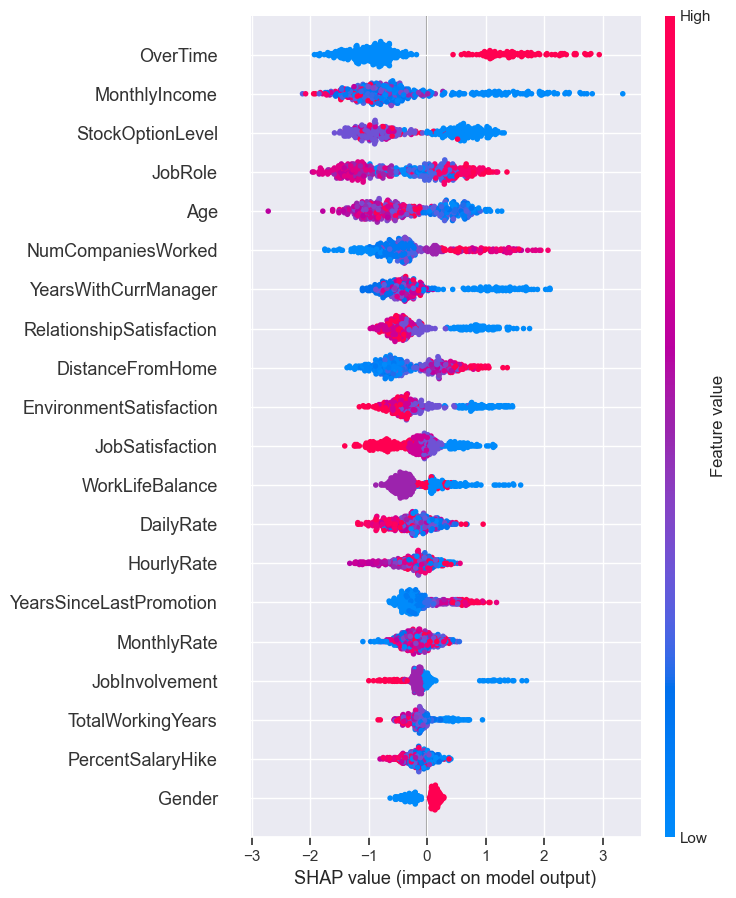

In [65]:
## Implementing XGBoost to improve predicting performance of model 

from xgboost import XGBClassifier
import shap

# Calculate scale_pos_weight = #negative / #positive
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict & Evaluate
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred)) 


# For tree-based models like RF or XGBoost
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Summary plot (global feature importance)
shap.summary_plot(shap_values, X_test)

# Force plot for individual prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0]) 


Used SHAP to interpret model predictions and understand what drives attrition. OverTime was the most impactful feature — employees with frequent overtime are much more likely to leave. Other top drivers included MonthlyIncome, StockOptionLevel, JobRole, and Age.
Interestingly, low income and limited stock options increased the risk of attrition, while higher values of WorkLifeBalance, RelationshipSatisfaction, and YearsWithCurrManager reduced it. These findings align well with real-world HR patterns and offer actionable insights for retention strategies.

**Optimising features so that highly correlated variables do not negatively impact model performance by introducing redundancy.** 

### 1.Variance Inflation factor

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 3: Calculate Variance Inflation Factor (VIF)
# VIF Calculation requires only numerical features
numerical_df = df.select_dtypes(include=[np.number])

# Add a constant column for VIF calculation
numerical_df = numerical_df.assign(constant=1)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = numerical_df.columns
vif_data['VIF'] = [variance_inflation_factor(numerical_df.values, i) for i in range(numerical_df.shape[1])]

# Drop the constant column's VIF result
vif_data = vif_data[vif_data['Feature'] != 'constant']

print("\nVariance Inflation Factor (VIF):")
print(vif_data.sort_values(by="VIF", ascending=False)) 


Variance Inflation Factor (VIF):
                     Feature        VIF
12                  JobLevel  11.834363
16             MonthlyIncome  11.052676
24         TotalWorkingYears   4.829455
27            YearsAtCompany   4.614838
30      YearsWithCurrManager   2.796386
28        YearsInCurrentRole   2.742035
20         PercentSalaryHike   2.523898
21         PerformanceRating   2.520476
0                        Age   2.066156
4                 Department   1.950470
13                   JobRole   1.894752
15             MaritalStatus   1.855701
23          StockOptionLevel   1.823696
29   YearsSinceLastPromotion   1.691247
18        NumCompaniesWorked   1.277707
1                  Attrition   1.273395
19                  OverTime   1.113336
6                  Education   1.063531
11            JobInvolvement   1.037777
14           JobSatisfaction   1.037535
8    EnvironmentSatisfaction   1.036341
22  RelationshipSatisfaction   1.025978
25     TrainingTimesLastYear   1.025904
3     

In [78]:
# Step 2: Identify High Correlations
# Threshold for multicollinearity (e.g., absolute correlation > 0.8)
threshold = 0.8
high_correlation_pairs = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix != 1.0)]

print("Highly Correlated Features (Correlation > 0.8):")
print(high_correlation_pairs.dropna(how='all').dropna(axis=1, how='all'))


Highly Correlated Features (Correlation > 0.8):
               JobLevel  MonthlyIncome
JobLevel            NaN         0.9503
MonthlyIncome    0.9503            NaN


In [80]:
# Drop a specific column, e.g., 'JobLevel'
df = df.drop(columns=['JobLevel'])

# Verify the column is removed
print("Updated DataFrame columns:")
print(df.columns) 

Updated DataFrame columns:
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


##Key features contributing to the Attrition of Employees. 

In [62]:
# Return the feature importances (the higher, the more important the feature).
importances = pd.DataFrame({'feature':df.iloc[:, 1:df.shape[1]].columns,'importance':np.round(rf_model.feature_importances_,3)}) #Note: The target column is at position 0
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances 


feature_importance = {'age': 0.12, 'income': 0.3, 'gender': 0.05}
sorted_features = dict(sorted(feature_importance.items(), key=lambda x: x[1], reverse=True))
print(sorted_features) 

,importance
feature,
StockOptionLevel,0.079
MonthlyIncome,0.064
JobSatisfaction,0.053
YearsWithCurrManager,0.046
Attrition,0.045
YearsInCurrentRole,0.045
EnvironmentSatisfaction,0.041
TotalWorkingYears,0.041
MonthlyRate,0.040


##Visual Representation of key Contributors of Attrtion features

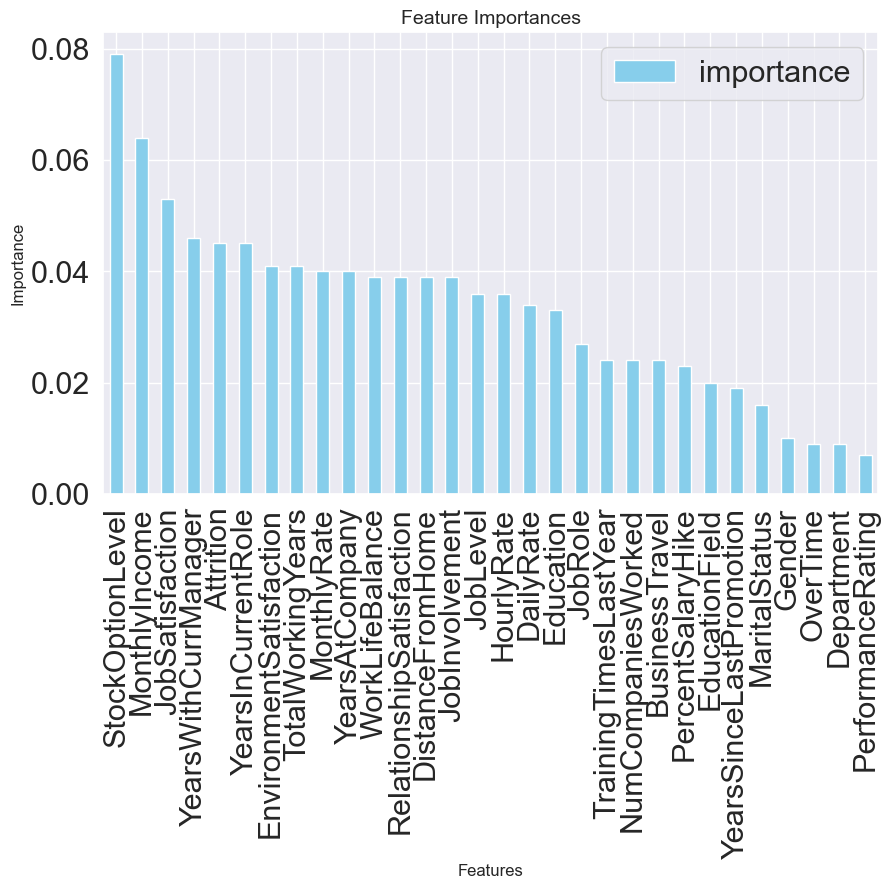

In [64]:
importances.plot(kind='bar', color='skyblue', figsize=(10,6))
plt.title('Feature Importances', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.show() 

Monthly income and total working years are powerful factor which leads to attrition, as an strategy to retain talent so we should revise compensation strategies and learning and developement opportunities for people with more years of experience.  

## Conclusion:

Based on our analysis of the IBM HR Analytics Employee Attrition & Performance dataset, we can draw the following conclusions:

- The (Random Forecast Model + SMOTE + Hyperparameter tuning) performs best Job in correctly identify roughly 42% of employees who will leave (recall) with 33% precision.

- Factors such as years at organisation, monthly income, and total working years were found to be important predictors of employee attrition.

- The company can use the model to identify employees who are at high risk of leaving and take proactive measures to retain them.

**Some more Insights:**

- **Labrotatory Technician, Research Scientist and Sales executives are the employee one who have been with organisation since 3-4 years and have had no promotions, indicating that Sales Department needs development in terms of Promotions, salary increment and on Job training.** 

-**Performance Rating and Years Since Last Promotion is right skewed, suggests thay small group of high performers or employees who have not been promoted for a long time and could signal a need to focus on career progression for employees in the long tail.**

Moreover, Managers and Research directors have had no promotions since 3 years, while such levels takes time for employees to get promoted, suggestion is to run surveys for employees who are at manager and director levels to find their satisfaction level in terms of Job and career progression. 


**Strategies and Recommendation:** 
                   
- Possible strategies for  include offering competitive compensation and benefits packages, providing opportunities for career growth and development, and fostering a positive work environment.

- Overall, our analysis highlights the importance of leveraging HR analytics to gain insights into workforce trends and patterns, and ultimately to make strategic decisions that can improve employee retention and reduce the costs associated with employee turnover. 